In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
tf.config.set_visible_devices([], 'GPU' )

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS=50

In [4]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

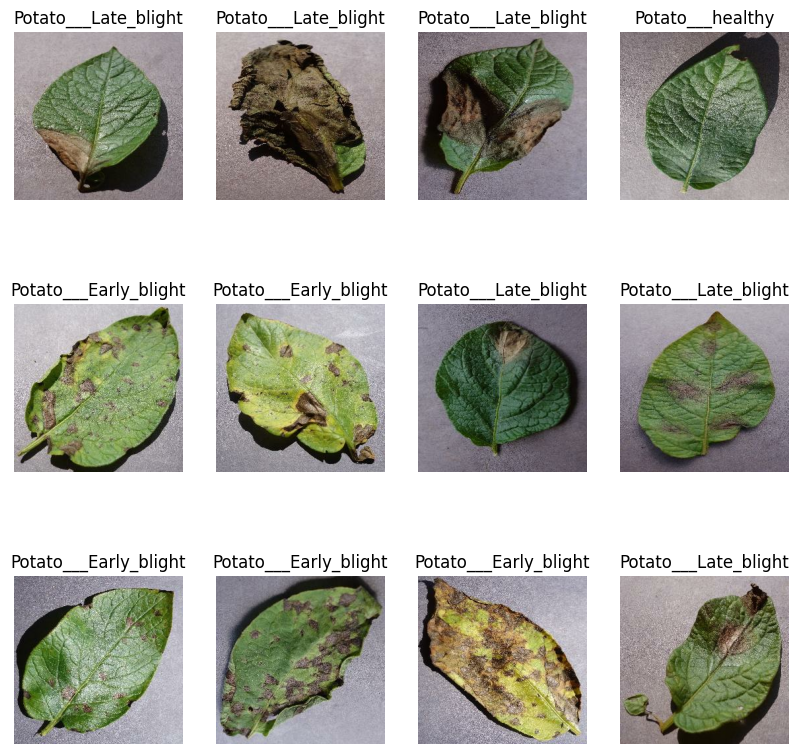

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [7]:
len(dataset)

68

In [8]:
# 80% ===> training
# 10% ==> validation
# 10% ==> test 

In [9]:
train_size =0.8
len(dataset)* train_size


54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [12]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=dataset.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle =True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle :
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size= int(train_split * ds_size)
    val_size= int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
train_ds=  train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=  val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=  test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [21]:
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=INPUT_SHAPE)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [23]:
model.compile(
    optimizer ='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size= BATCH_SIZE,
    validation_data= val_ds,
    verbose =1,
    epochs= 50,
     
)
    

Epoch 1/50
54/54 [==============================] - 128s 2s/step - loss: 0.9077 - accuracy: 0.5162 - val_loss: 0.8352 - val_accuracy: 0.5677
Epoch 2/50
54/54 [==============================] - 102s 2s/step - loss: 0.5979 - accuracy: 0.7419 - val_loss: 0.4955 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 101s 2s/step - loss: 0.3894 - accuracy: 0.8322 - val_loss: 0.2792 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 102s 2s/step - loss: 0.2912 - accuracy: 0.8814 - val_loss: 0.2445 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 104s 2s/step - loss: 0.2228 - accuracy: 0.9120 - val_loss: 0.1691 - val_accuracy: 0.9479
Epoch 6/50
54/54 [==============================] - 104s 2s/step - loss: 0.1791 - accuracy: 0.9352 - val_loss: 0.1742 - val_accuracy: 0.9479
Epoch 7/50
54/54 [==============================] - 105s 2s/step - loss: 0.1194 - accuracy: 0.9537 - val_loss: 0.1418 - val_accuracy: 0.9375
Epoch 8/50
54

In [25]:
scores =model.evaluate(test_ds)

8/8 [==============================] - 5s 452ms/step - loss: 0.0691 - accuracy: 0.9805


In [26]:
scores

[0.06914635747671127, 0.98046875]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.5162037014961243,
 0.7418981194496155,
 0.8321759104728699,
 0.8813657164573669,
 0.9120370149612427,
 0.9351851940155029,
 0.9537037014961243,
 0.9328703880310059,
 0.9658564925193787,
 0.9722222089767456,
 0.9664351940155029,
 0.9728009104728699,
 0.9814814925193787,
 0.9861111044883728,
 0.9745370149612427,
 0.9803240895271301,
 0.9745370149612427,
 0.9774305820465088,
 0.9872685074806213,
 0.9884259104728699,
 0.9803240895271301,
 0.9884259104728699,
 0.9809027910232544,
 0.9797453880310059,
 0.9855324029922485,
 0.9837962985038757,
 0.9907407164573669,
 0.9872685074806213,
 0.9745370149612427,
 0.9918981194496155,
 0.9947916865348816,
 0.9837962985038757,
 0.9884259104728699,
 0.9872685074806213,
 0.9930555820465088,
 0.9959490895271301,
 0.9942129850387573,
 0.9953703880310059,
 0.9913194179534912,
 0.9959490895271301,
 0.9930555820465088,
 0.9971064925193787,
 0.9913194179534912,
 0.9745370149612427,
 0.9976851940155029,
 0.9913194179534912,
 0.9837962985038757,
 0.9803240895

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

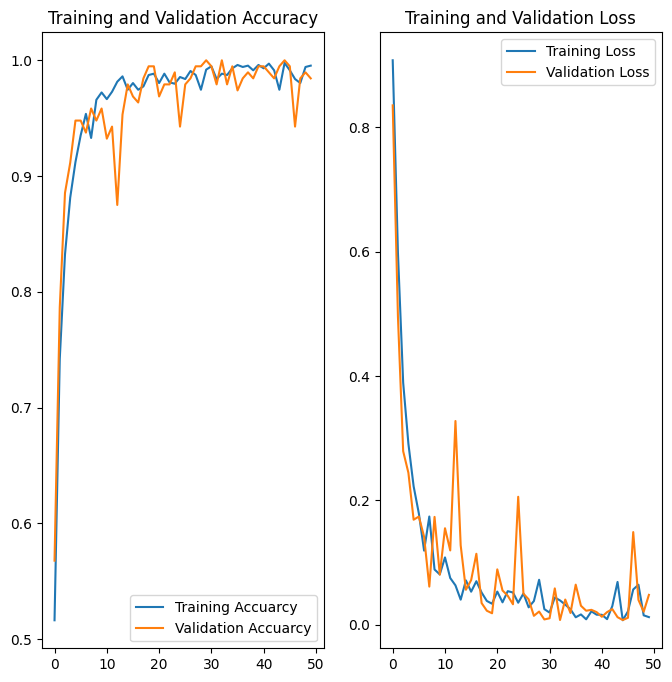

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ="Training Accuarcy")
plt.plot(range(EPOCHS), val_acc, label ="Validation Accuarcy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ="Training Loss")
plt.plot(range(EPOCHS), val_loss , label ="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [33]:
import numpy as np

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 1s 677ms/step
PREDICTED LABEL :  Potato___Early_blight


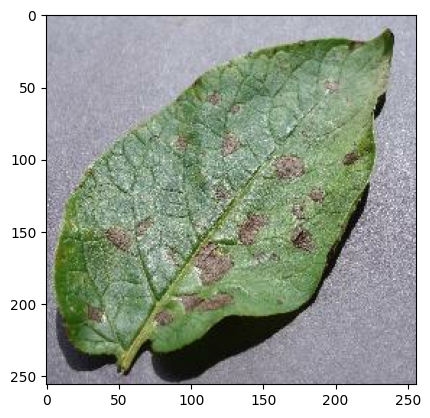

In [34]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("PREDICTED LABEL : ", class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 49ms/step


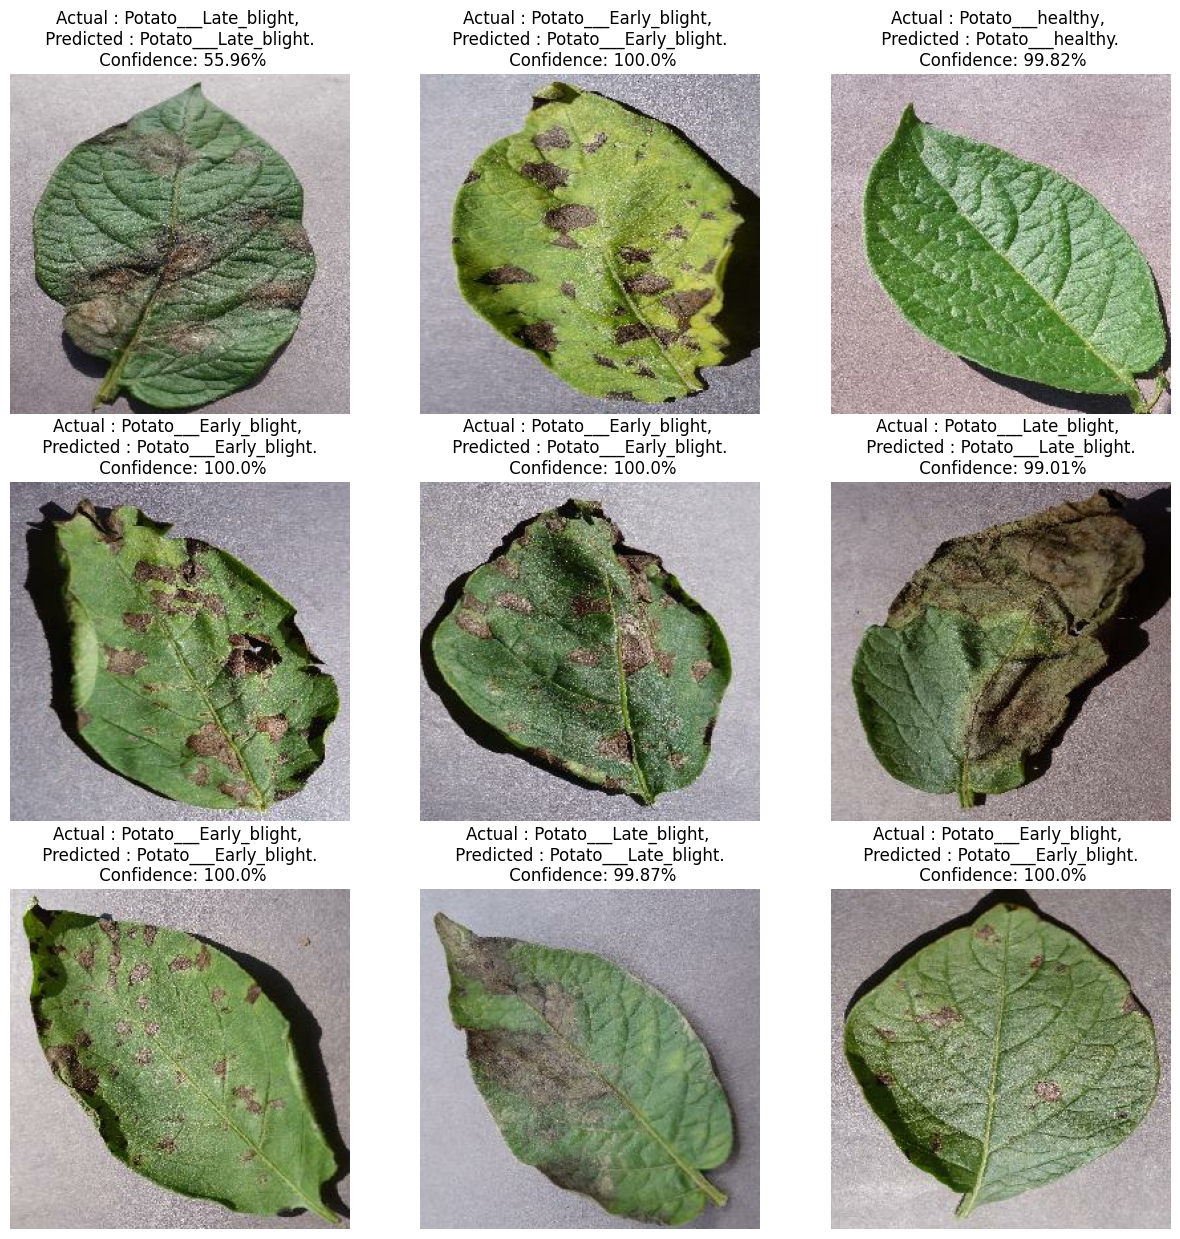

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class}, \n Predicted : {predicted_class}. \n Confidence: {confidence}%")
        
        plt.axis('off')

In [37]:
model_version = 3
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets


INFO:tensorflow:Assets written to: ../saved_models/3\assets
